In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
from io import StringIO

# Load and export a variety of common formats

## csv

In [2]:
# import
retail = pd.read_csv('data/Online Retail.csv')
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01/12/2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01/12/2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01/12/2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01/12/2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01/12/2010 08:26,3.39,17850.0,United Kingdom


In [3]:
# export
retail.to_csv('data/saved_data/Online_Retail.csv', index=False)

# check
retail = pd.read_csv('data/saved_data/Online_Retail.csv')
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01/12/2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01/12/2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01/12/2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01/12/2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01/12/2010 08:26,3.39,17850.0,United Kingdom


### In R

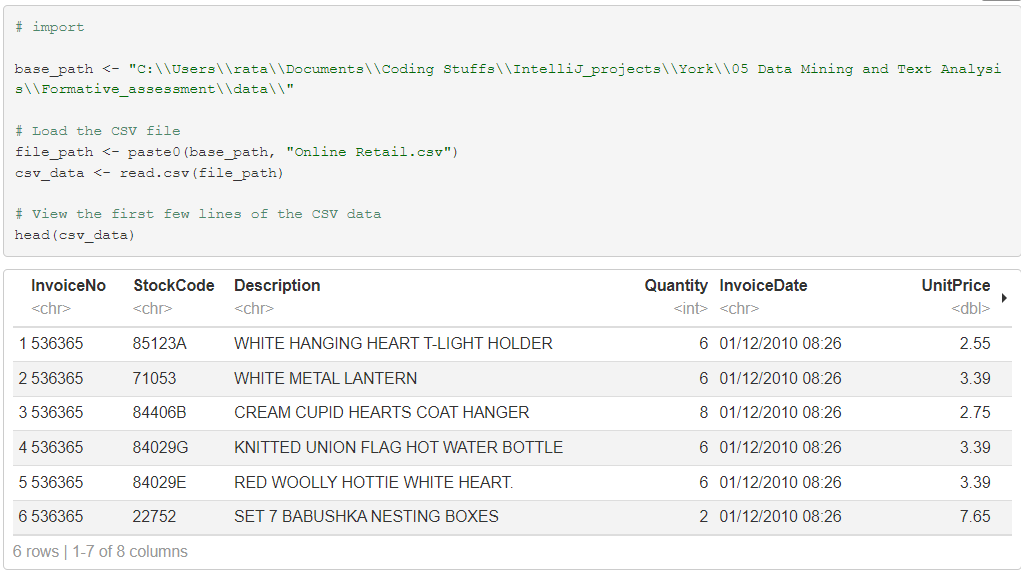

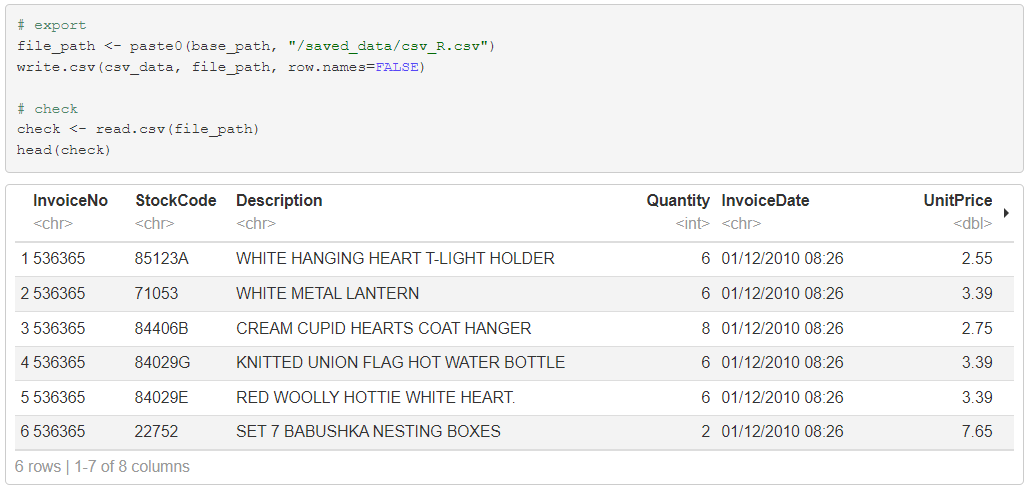

## json

In [4]:
# import
covid = pd.read_json('data/ukhsa-chart-download.json')
covid.head()

,theme,sub_theme,topic,geography_type,geography,metric,age,stratum,sex,year,date,metric_value,in_reporting_delay_period
0,infectious_disease,respiratory,COVID-19,Nation,England,COVID-19_cases_casesByDay,all,default,all,2024,2024-09-18,52,False
1,infectious_disease,respiratory,COVID-19,Nation,England,COVID-19_cases_casesByDay,all,default,all,2024,2024-09-17,279,False
2,infectious_disease,respiratory,COVID-19,Nation,England,COVID-19_cases_casesByDay,all,default,all,2024,2024-09-16,370,False
3,infectious_disease,respiratory,COVID-19,Nation,England,COVID-19_cases_casesByDay,all,default,all,2024,2024-09-15,236,False
4,infectious_disease,respiratory,COVID-19,Nation,England,COVID-19_cases_casesByDay,all,default,all,2024,2024-09-14,234,False


In [5]:
# export
covid.to_json('data/saved_data/covid.json', index=False)

# check
covid = pd.read_json('data/saved_data/covid.json')
covid.head()

,theme,sub_theme,topic,geography_type,geography,metric,age,stratum,sex,year,date,metric_value,in_reporting_delay_period
0,infectious_disease,respiratory,COVID-19,Nation,England,COVID-19_cases_casesByDay,all,default,all,2024,2024-09-18,52,False
1,infectious_disease,respiratory,COVID-19,Nation,England,COVID-19_cases_casesByDay,all,default,all,2024,2024-09-17,279,False
2,infectious_disease,respiratory,COVID-19,Nation,England,COVID-19_cases_casesByDay,all,default,all,2024,2024-09-16,370,False
3,infectious_disease,respiratory,COVID-19,Nation,England,COVID-19_cases_casesByDay,all,default,all,2024,2024-09-15,236,False
4,infectious_disease,respiratory,COVID-19,Nation,England,COVID-19_cases_casesByDay,all,default,all,2024,2024-09-14,234,False


### In R

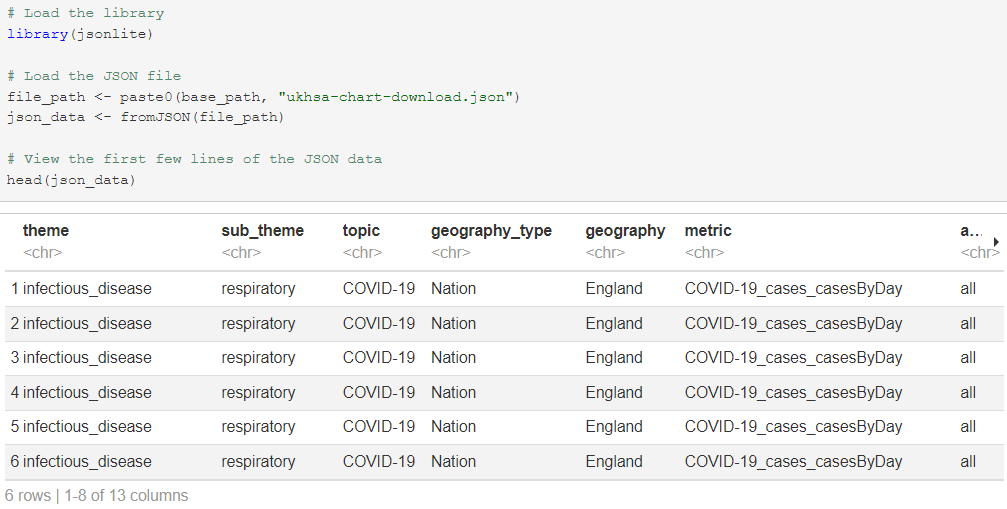

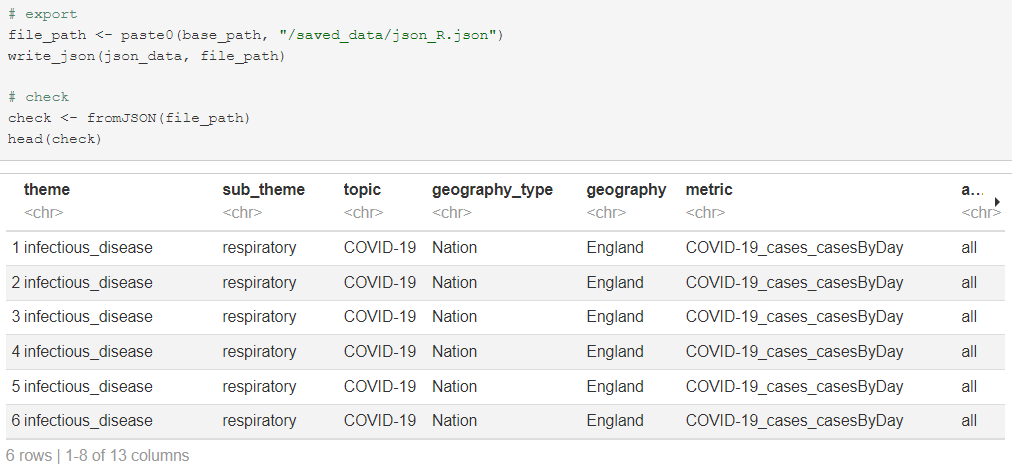

## Excel file

required an extra add on

In [6]:
# import excel file - requires installing extra library openpyxl
flu = pd.read_excel('data/datadictionary-outpatient-influenza-like-illness.xlsx')
flu.head()

,Field Title,Field Name,Data type,Description
0,Season,Season,Plain text,Influenza surveillance season: Influenza surve...
1,NaN,NaN,NaN,Values include:
2,NaN,NaN,NaN,"2001-2002, 2002-2003, 2003-2004, 2004-2005, 20..."
3,Date_code,Date_code,Number,Centers for Disease Control and Prevention (CD...
4,Weekending,Weekending,Number,Date of the last day included in the CDC MMWR ...


In [7]:
# export 
flu.to_excel('data/saved_data/flu.xlsx', index=False)

# check
flu = pd.read_excel('data/saved_data/flu.xlsx')
flu.head()

,Field Title,Field Name,Data type,Description
0,Season,Season,Plain text,Influenza surveillance season: Influenza surve...
1,NaN,NaN,NaN,Values include:
2,NaN,NaN,NaN,"2001-2002, 2002-2003, 2003-2004, 2004-2005, 20..."
3,Date_code,Date_code,Number,Centers for Disease Control and Prevention (CD...
4,Weekending,Weekending,Number,Date of the last day included in the CDC MMWR ...


### In R

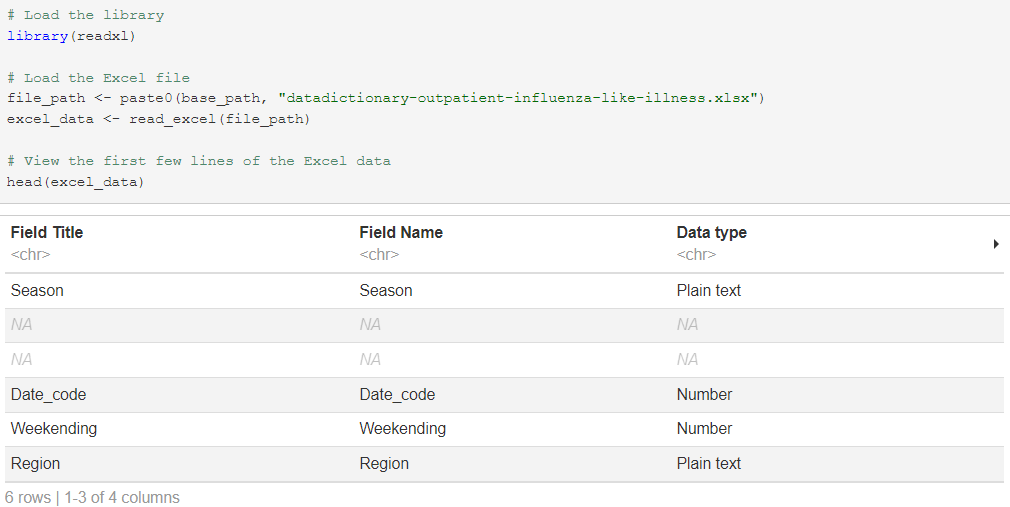

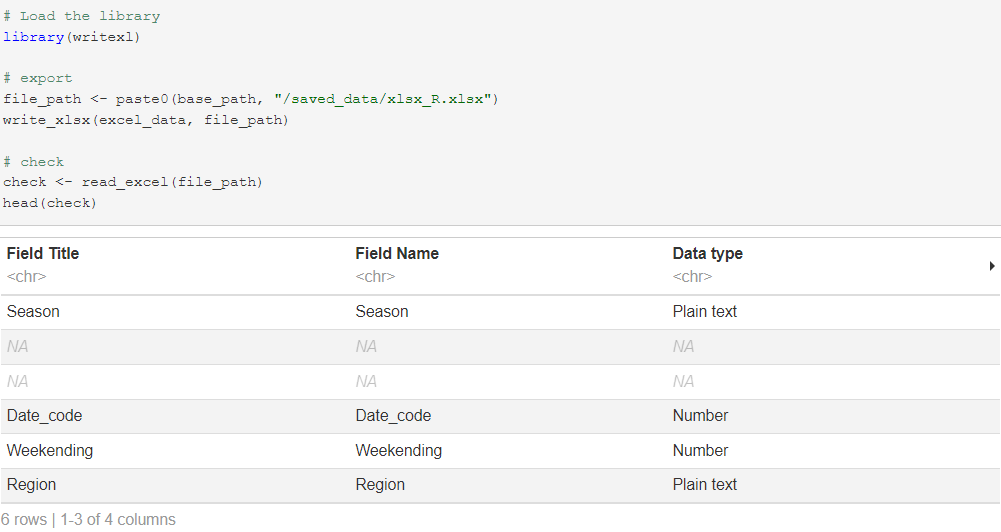

## Get data from an API

In [8]:
url = 'https://api.waqi.info/feed/@5724/?token=110a7b7c9d0b11db1862c934ca4881956170ae00'

# Fetch the data
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Convert the JSON data to a dictionary
    data = response.json()

    # Normalize the data and load it into a pandas DataFrame
    weather = pd.json_normalize(data)

weather.head()

,status,data.aqi,data.idx,data.attributions,data.city.geo,data.city.name,data.city.url,data.city.location,data.dominentpol,data.iaqi.co.v,...,data.iaqi.w.v,data.time.s,data.time.tz,data.time.v,data.time.iso,data.forecast.daily.o3,data.forecast.daily.pm10,data.forecast.daily.pm25,data.forecast.daily.uvi,data.debug.sync
0,ok,42,5724,"[{'url': 'http://uk-air.defra.gov.uk/', 'name'...","[51.5073509, -0.1277583]",London,https://aqicn.org/city/london,,pm25,0.7,...,5.7,2024-09-23 20:00:00,+01:00,1727121600,2024-09-23T20:00:00+01:00,"[{'avg': 9, 'day': '2024-09-21', 'max': 20, 'm...","[{'avg': 29, 'day': '2024-09-21', 'max': 37, '...","[{'avg': 80, 'day': '2024-09-21', 'max': 97, '...","[{'avg': 0, 'day': '2024-09-21', 'max': 3, 'mi...",2024-09-24T05:55:43+09:00


### In R

Data is imported, but more work would be needed to flatten into a dataframe.

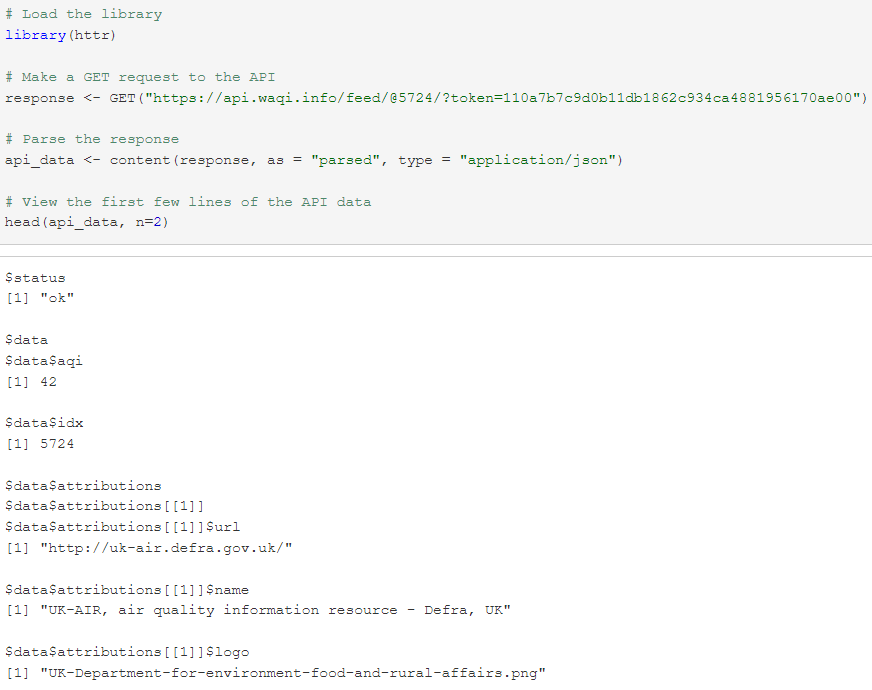

## Scrape data from Wikipedia

In [9]:
# Wikipedia page URL
url = 'https://en.wikipedia.org/wiki/Types_of_volcanic_eruptions'

# Fetch the content of the page
response = requests.get(url)

# Create a BeautifulSoup object
soup = BeautifulSoup(response.content, 'lxml')

# Find the table you want (in this case, the first table)
table = soup.find('table', {'class': 'wikitable'})

# Read the HTML table into a pandas DataFrame
volcanoes = pd.read_html(StringIO(str(table)))[0]

# Display the DataFrame
volcanoes.head()


,VEI,Plume height,Eruptive volume *,Typical eruption type,Frequency **,Example
0,0,<100 m (330 ft),"1,000 m3 (35,300 cu ft)",Hawaiian,Continuous,Kīlauea
1,1,"100–1,000 m (300–3,300 ft)","10,000 m3 (353,000 cu ft)",Hawaiian/Strombolian,Daily,Stromboli
2,2,1–5 km (1–3 mi),"1,000,000 m3 (35,300,000 cu ft) †",Strombolian/Vulcanian,Fortnightly,Galeras (1992)
3,3,3–15 km (2–9 mi),"10,000,000 m3 (353,000,000 cu ft)",Vulcanian,3 months,Nevado del Ruiz (1985)
4,4,10–25 km (6–16 mi),"100,000,000 m3 (0.024 cu mi)",Vulcanian/Peléan,18 months,Eyjafjallajökull (2010)


### In R

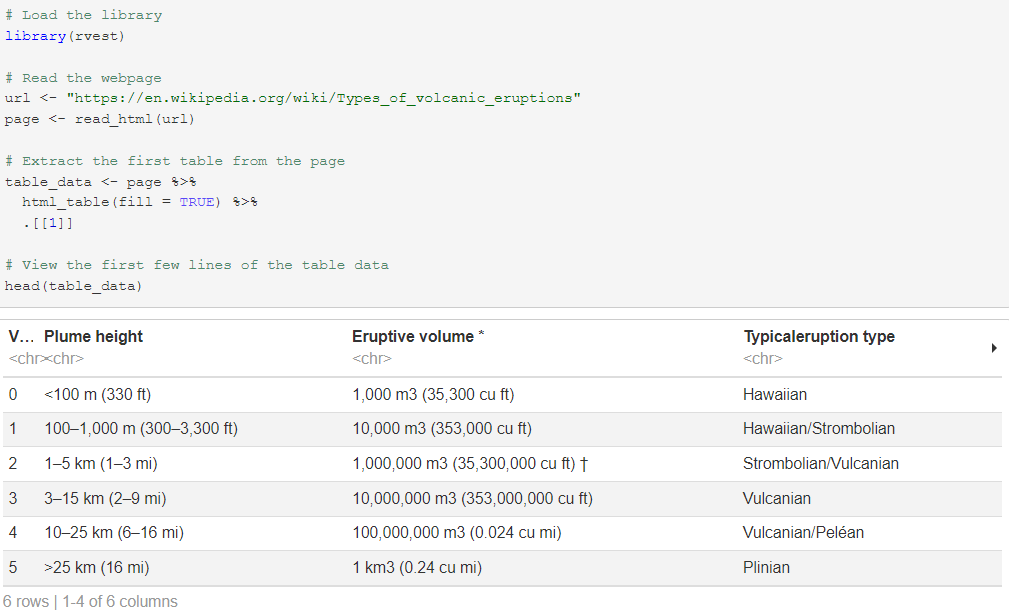

# Comparison with WEKA

WEKA claims to import various filetypes, though of the ones above only csv and json. In practice, it seems to only import arff files. And data must be heavily preprocessed and cleaned before conversion to arff files that will actually open. This was done using python and pandas.

#### Example function for converting to arff file

In [10]:
def clean_and_convert_csv_to_arff(csv_file, arff_file):
    # Read CSV file into a pandas DataFrame
    df = pd.read_csv(csv_file)
    
    # Clean column names: remove punctuation, replace spaces and '/' with '_'
    df.columns = df.columns.str.replace(r'[^\w\s]', '', regex=True).str.replace(' ', '_').str.replace('/', '_')

    # Clean text data (for nominal values): remove punctuation, replace spaces with underscores
    for column in df.select_dtypes(include=['object']).columns:
        df[column] = df[column].str.replace(r'[^\w\s]', '', regex=True).str.replace(' ', '_')

    # Open a file to write the ARFF data
    with open(arff_file, 'w') as f:
        # Write ARFF header (relation name is based on the CSV file name)
        f.write(f"@relation {csv_file.replace('.csv', '')}\n\n")
        
        # Write attributes (columns)
        for column in df.columns:
            if df[column].dtype == 'object':  # Nominal (categorical) data
                unique_values = ','.join(df[column].dropna().unique())
                f.write(f"@attribute {column} {{{unique_values}}}\n")
            else:
                # Numeric data
                f.write(f"@attribute {column} numeric\n")
        
        # Write the @data section
        f.write("\n@data\n")
        for _, row in df.iterrows():
            # Replace NaN values with '?'
            row_data = ','.join(['?' if pd.isna(x) else str(x) for x in row])
            f.write(f"{row_data}\n")

    print(f"ARFF file '{arff_file}' created successfully!")